In [ ]:
# This is version 3,
# First run of ACC pre formatting
# Version 4 will delete generation

In [ ]:
# Inverse power law to generate 100 predictions at each prediction sample size

In [ ]:
# Latest draft of TMP
https://docs.google.com/document/d/1LgIEkQ_pV7uQacI4SDf1Je-Ttk7d-1d2HlGrhMKuDfQ/edit

In [ ]:
# from 7BCD_distribution_search
# original histogram code in panel_D_v2.ipynb

In [94]:
import pandas as pd
import json
from statistics import mean
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
# from scipy import stats # ?

In [2]:
colors = pd.read_csv('data/TMP_cohort_colors_n26_20210228.csv',
                     sep = ',', skiprows = 1, names = ['Cohort', 'Hexi'])

sample_response_DF = pd.read_csv('data/sample_response_DF_20210805.tsv',
                                          sep = '\t')

In [32]:
colors.head()

,Cohort,Hexi
0,ACC,#C1A72F
1,BLCA,#FAD2D9
2,BRCA,#ED2891
3,CESC,#F6B667
4,COADREAD,#9EDDF9


In [5]:
sample_response_DF.head() # Processed F1 scores for 100 resamplings at each sample step size

,Cohort,Sample_size_100_accuracies
0,ACC,"{""5"": [0.34285714285714286, 0.6901098901098901..."
1,BLCA,"{""5"": [0.0, 0.8, 0.901010101010101, 0.35606060..."
2,BRCA,"{""5"": [0.4499999999999999, 0.8967032967032967,..."
3,CESC,"{""5"": [0.6329966329966329, 1.0, 0.52, 0.355555..."
4,COADREAD,"{""15"": [0.30416666666666664, 0.713043478260869..."


In [29]:
lower = [0,-1000,-1] # Define bounds
upper = [.5,1000,0]
# Define function, use to make 100 predictions at sample sizes 80 to 250
def Y_acc(x, a, b, c):
    Y_acc = (1-a)-b*x**c
    return Y_acc

In [ ]:
# Make a Burr12 prediction for each of the 11 partial response cohorts at each of these sample sizes
prediction_samples = [80,90,100,
         110,120,130,140,150,160,170,180,
         190,200,210,220,230,240,250]

In [ ]:
# replace fin_val_list with 80 - 250 step val list

In [33]:
partial_response_cohorts_to_predict = [('ACC', 0), # index corresponds to sample_response_DF
                        ('CESC', 3),
                        ('ESCC', 5),
                        ('KIRP', 9),
                        ('MESO', 14),
                        ('PAAD', 16),
                        ('PCPG', 17),
                        ('SARC', 19),
                        ('TGCT', 21),
                        ('THYM', 23),
                        ('UVM', 25),]

In [110]:
# generate 100 predictions at each sample size for each cohort
# ~10 second runtime
cohort_prdctns = {} # will be dict of dicts

store_full_samples_and_scores = []  # <-------------------

for cohort_tuple in partial_response_cohorts_to_predict:

    cohort = cohort_tuple[0]
    print(cohort)
    cohort_index = cohort_tuple[1] # to json converter
    
    accuracy_response_dct = {
        int(k):[i for i in v] for k,v in json.loads( # json
        sample_response_DF.iloc[cohort_index,1]).items()
    }
    accuracy_response = sorted(accuracy_response_dct.items())
    
    full_samples = [] # to green dots on plot
    full_scores = []
    
    for i in list(range(0, len(accuracy_response))): # want for overlap on plot
        full_samples.append(accuracy_response[i][0])
        mean_score = mean(accuracy_response[i][1])
        full_scores.append(mean_score)

    sample_max = 14 # smp sz 75
    sample_min = 6 # smp sz 35

    fitting_samples = [] # This is 35 to 70 range
    fitting_scores = []
    
    for i in list(range(sample_min, sample_max)): # Iterate fitting region
        score_block = accuracy_response[i][1]
        sample_size = accuracy_response[i][0]
        fitting_samples.append(sample_size)
        fitting_scores.append(score_block) # raw scores for this sample step size

    hndrd_prdctns_smp_sz_n = []
    
    # Within cohort loop
    
    prdctn_dict = {}
    
    for resampling_idx in list(range(0,100)): # run the inverse power function 100 times

        scores_temp = [] # 8 scores for each resampling on fitting window sample sizes

        for tuple_n in accuracy_response[sample_min:sample_max]: # sorted dict, iterate 8 fitting window keys
            
            scores_temp.append(tuple_n[1][resampling_idx]) # Pull nth item from 100 score list value for each sample size in fitting window

        front_end_param_set_n, _ = curve_fit( # Set parameters for each of 100 resamplings
            Y_acc, # here is the inverse power function, set front-end parameters 100
            fitting_samples,
            scores_temp,
            bounds=[lower,upper]
        )
        
        y_predict = Y_acc(prediction_samples, *front_end_param_set_n)
        
        prdctn_dict[resampling_idx] = y_predict

    cohort_prdctns[cohort] = prdctn_dict
    
    store_full_samples_and_scores.append((cohort, full_samples, full_scores))
    break       
print('done')

ACC
done


In [111]:
store_full_samples_and_scores

[('ACC',
  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
  [0.4739938310847402,
   0.6095467495737286,
   0.7059698211452738,
   0.7320100492666509,
   0.7753934094701465,
   0.7976278873754781,
   0.8175519337482526,
   0.8262655838765793,
   0.8441491629566804,
   0.8500055686902052,
   0.8552137164335809,
   0.8599484436588266,
   0.8716040058898213,
   0.8706254272060039,
   0.8764772554926882])]

In [ ]:
cohort_prdctns

In [ ]:
# Next steps: 2021-10-24

# Put cohort_prdctns in dataframe - done
# Write cohort_prdctns dataframe to file - done

# pre process into lists of 100 predictions for each sample size
# Feed to Burr12, get point predcitions for each sample size

    # Make histogram at each sample size (?) - use peak val as y vector len 18, 
    # sample sizes 80 - 250 as x val

# Feed point predictions at each prediction sample size to plot function

In [56]:
cohort_prdctnsDF = pd.DataFrame(cohort_prdctns)

In [67]:
# Check lengths of score lists match length of prediction sample size list
for i in cohort_prdctnsDF:
    print(i)
    scrs_rsmlng_n = cohort_prdctnsDF.loc[0, i]
    print(len(scrs_rsmlng_n))
    break

ACC
18


In [68]:
len(prediction_samples) # check

18

In [63]:
cohort_prdctnsDF.to_csv( # target directory for panel plots
    'panel_D_v2_out/cohort_prdctnsDF.tsv',
    sep = '\t',
    index = False
)

In [75]:
j

NameError: name 'j' is not defined

In [ ]:
# pseudo template
burr12_input_list = ('CHRT', [])

In [89]:
list(range(0,18))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [87]:
# Get ACC prediction at sample size 80
scores_at_sample_size_n = []

for i in cohort_prdctnsDF.index: # i is 100 resampling indexes
    scores_at_18_sample_sizes = cohort_prdctnsDF.iloc[i, 0] # zero locks to ACC
    score_at_eighty = scores_at_18_sample_sizes[0] # zero locks to sample size 80
    scores_at_sample_size_n.append(score_at_eighty)
#     break

In [92]:
scores_at_sample_size_n

[0.8382187907675323,
 0.893900002539847,
 0.8818616362573108,
 0.8506080336786486,
 0.8609745875207704,
 0.8604600188523139,
 0.8837457655087918,
 0.8783709452805467,
 0.9049597572040807,
 0.897701715822706,
 0.8794451701291537,
 0.8689865333740892,
 0.8845770280791581,
 0.863870754541219,
 0.9041281996063818,
 0.8990333556574026,
 0.8853045959474388,
 0.8983647408707396,
 0.8809848119235838,
 0.8818893751630845,
 0.842137625693031,
 0.8815917702484772,
 0.8996954806660644,
 0.9254330106368303,
 0.856254640377708,
 0.877142335804098,
 0.8560464650567302,
 0.8718066550839818,
 0.8597587291011425,
 0.8903083732108632,
 0.9021698910549873,
 0.906700596263247,
 0.8950245395889769,
 0.8372331990229167,
 0.8588025165407607,
 0.8708647909752116,
 0.8605971319108864,
 0.8625381887710172,
 0.8819124858379565,
 0.8628059507822528,
 0.8779710513414816,
 0.8978947571572095,
 0.911095139395452,
 0.8930594689814993,
 0.894821098375193,
 0.8865845510194302,
 0.8674030204435813,
 0.8598575561931348,
 

In [60]:
cohort_prdctnsDF.head()
# Each row is a resampling

,ACC,CESC,ESCC,KIRP,MESO,PAAD,PCPG,SARC,TGCT,THYM,UVM
0,"[0.8382187907675323, 0.8418947790584, 0.845112...","[0.909872303275726, 0.9150539101965379, 0.9191...","[0.9692854260298397, 0.9726981564709687, 0.975...","[0.8652471123762759, 0.8731122277443029, 0.879...","[0.9080200572760053, 0.9085149274590572, 0.908...","[0.9928449611314318, 0.9936399654501616, 0.994...","[0.8671683922674278, 0.8796874922262635, 0.889...","[0.9510904509706972, 0.953073159781579, 0.9546...","[0.9884740840259746, 0.9897547413564217, 0.990...","[0.9473370643944479, 0.944802590403403, 0.9427...","[0.9606724508964246, 0.9597508651939678, 0.959..."
1,"[0.893900002539847, 0.9029991610889868, 0.9102...","[0.915277066769725, 0.9238631303622837, 0.9307...","[0.9616815466679681, 0.9659391525937494, 0.969...","[0.8884587763515603, 0.9008522456458314, 0.910...","[0.9347091736841844, 0.9419637099414957, 0.947...","[0.9849028305307683, 0.9865802938051262, 0.987...","[0.8881111954655186, 0.8975554873691425, 0.905...","[0.9349976135793306, 0.932165537053411, 0.9296...","[0.9679433516093121, 0.9670105014100363, 0.966...","[0.9555759047382103, 0.9593586717404504, 0.962...","[0.9527801805276821, 0.9513474721293085, 0.950..."
2,"[0.8818616362573108, 0.8881216074417773, 0.893...","[0.8883989614553234, 0.8943932339305308, 0.899...","[0.9692268629497965, 0.9726461003998191, 0.975...","[0.8872807847802144, 0.8973745891368292, 0.905...","[0.916074352862361, 0.9197371747590343, 0.9228...","[0.9875542947366729, 0.9889371508770426, 0.990...","[0.8973620568035858, 0.9077115446591809, 0.916...","[0.938570365783771, 0.942331684729864, 0.94534...","[0.9813468639398695, 0.9834194346132069, 0.985...","[0.9629921238386588, 0.9671041100788078, 0.970...","[0.9559828248390072, 0.9547816267811415, 0.953..."
3,"[0.8506080336786486, 0.8507678113635809, 0.850...","[0.9247010397399882, 0.9330675908799895, 0.939...","[0.9719170614161609, 0.9750373879250867, 0.977...","[0.8332862112477557, 0.8340444853165476, 0.834...","[0.9415470349234486, 0.9480418088207939, 0.953...","[0.987869964730063, 0.9892177464267227, 0.9902...","[0.8950263585222819, 0.9027398464992564, 0.908...","[0.9446396375102474, 0.9507907888979973, 0.955...","[0.9897579167714603, 0.9908959260190758, 0.991...","[0.9584420502479416, 0.9630596002194255, 0.966...","[0.9662215609661312, 0.9699747208587832, 0.972..."
4,"[0.8609745875207704, 0.8658338225590076, 0.870...","[0.9179211657590387, 0.9253106898097483, 0.931...","[0.9596441781365808, 0.963342823373587, 0.9663...","[0.850418285134239, 0.8517793894531969, 0.8529...","[0.938576127967859, 0.9454010026377074, 0.9508...","[0.9942777880790086, 0.9949135894035632, 0.995...","[0.9051830407562852, 0.9137723517852017, 0.920...","[0.9418004041476091, 0.9482670259087523, 0.953...","[0.9776882643201888, 0.9801673460623825, 0.982...","[0.9599207356000852, 0.9643739872000757, 0.967...","[0.9721552463848462, 0.9752491078976411, 0.977..."


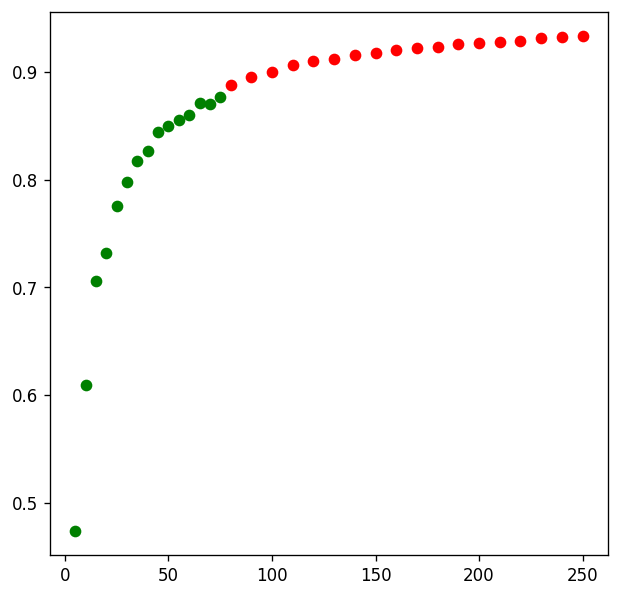

In [116]:
# ACC at 80
cohort = 'ACC'
dist = getattr(stats, 'burr12')

peak_val_list = [] # list of peak values for 18 sample sizes

for j in list(range(0,18)):
    

    scores_at_sample_size_n = []

    for i in cohort_prdctnsDF.index: # i is 100 resampling indexes
        scores_at_18_sample_sizes = cohort_prdctnsDF.iloc[i, 0] # zero locks to ACC
        score_at_eighty = scores_at_18_sample_sizes[j] # set through sample sizes
        scores_at_sample_size_n.append(score_at_eighty)

    a, b = dist.fit(scores_at_sample_size_n, floc=0, fscale=1)[:2]

    mxlst = list(
        dist.pdf(
            np.linspace(
                min(
                    scores_at_sample_size_n),
                max(
                    scores_at_sample_size_n),
                100),
            a,
            b
        )
    )

    mxv = max(mxlst)
    x_ndx = mxlst.index(mxv)
    xlst = np.linspace(min(scores_at_sample_size_n), max(scores_at_sample_size_n), 100)

    peak_val_list.append(xlst[x_ndx])
    
fig, ax = plt.subplots(figsize = (6,6), dpi = 120)

ax.scatter(
    store_full_samples_and_scores[0][1],
    store_full_samples_and_scores[0][2], color = 'green'
)
ax.scatter(
    prediction_samples,
    peak_val_list, color = 'red'
)

In [114]:
store_full_samples_and_scores

[('ACC',
  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
  [0.4739938310847402,
   0.6095467495737286,
   0.7059698211452738,
   0.7320100492666509,
   0.7753934094701465,
   0.7976278873754781,
   0.8175519337482526,
   0.8262655838765793,
   0.8441491629566804,
   0.8500055686902052,
   0.8552137164335809,
   0.8599484436588266,
   0.8716040058898213,
   0.8706254272060039,
   0.8764772554926882])]

In [115]:
store_full_samples_and_scores[0][1]

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]

In [108]:
peak_val_list

[0.8878474116517756,
 0.8955014754881845,
 0.9002382411808819,
 0.9060879825718924,
 0.9101797337522125,
 0.9123505756479751,
 0.9159384570536967,
 0.9176002033341996,
 0.9208734927458386,
 0.9221943828269866,
 0.9233685073435627,
 0.9263400977663689,
 0.9273127227275241,
 0.9281927167399977,
 0.9289927112967918,
 0.9317386190533425,
 0.9324268670033528,
 0.933060055117362]

In [ ]:
# Write panel D to file

In [ ]:
# Make eleven individual panels

In [ ]:
# Devel notes:
# get MSE for overlap points

In [ ]:
# Code parking lot
#     raw_mean_list = []
#     raw_median_list = []

#     cohort_list = []

#     plt.savefig('./version_6/'+cohort+'_'+distri+'_distr_trnslc2.png',
#                 facecolor=fig.get_facecolor(), edgecolor='none',
#                 bbox_inches = 'tight')